In [6]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
new_df=df[['Survived','Pclass','Sex','Age','Fare']]
new_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


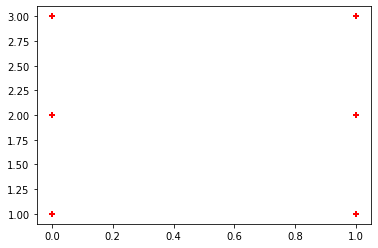

In [8]:
plt.scatter(df.Survived,df.Pclass,marker="+",color="red")

In [9]:
inputs=new_df.drop('Survived',axis='columns')
target=df.Survived

In [10]:
inputs.Sex=inputs.Sex.map({'male':1,"female":2})

In [11]:
inputs.Age[:10]


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [12]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.Age[:10]
# now i need to remove "NaN" in that place i will fill it with mean age

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [17]:
from sklearn import tree
model=tree.DecisionTreeClassifier()



In [18]:
X_train

,Pclass,Sex,Age,Fare
807,3,2,18.0,7.7750
113,3,2,20.0,9.8250
840,3,1,20.0,7.9250
408,3,1,21.0,7.7750
266,3,1,16.0,39.6875
...,...,...,...,...
97,1,1,23.0,63.3583
68,3,2,17.0,7.9250
620,3,1,27.0,14.4542
758,3,1,34.0,8.0500


In [19]:
y_train

807    0
113    0
840    0
408    0
266    0
      ..
97     1
68     1
620    0
758    0
157    0
Name: Survived, Length: 712, dtype: int64

In [21]:
# Now train model between them
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
model.score(X_test,y_test)

0.776536312849162